# fifa_cleaned 살펴보기
 - pandas profiling 진행

## 라이브러리 설치

In [1]:
! pip install category_encoders
!pip install eli5
!pip install pdpbox
!pip install shap
!pip3 install imbalanced-learn
!pip install -U matplotlib                     # heatmap 잘리는 현상 -> plotlib 다운그레이드
!pip3 install scikit-learn==1.0 -U             # bbc 'Patch' error -> scikitlearn 다운그레이드

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.1-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
import pandas as pd
from pdpbox.pdp import pdp_isolate, pdp_plot  # 가끔 error 발생
drive.mount('/content/drive')

path = '/content/drive/MyDrive/코드 스테이츠/섹션 2/N23x/N231/'

df = 'fifa_cleaned.csv'                   


df = pd.read_csv(path +df,sep=',')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3


In [4]:
df.duplicated().sum()

0

In [5]:
df[~(df['positions'] == 'GK')][df.isna().any(axis=1)]

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
10,189511,Sergio Busquets,Sergio Busquets i Burgos,1988-07-16,30,187.96,76.2,"CDM,CM",Spain,89,...,79+3,86+3,86+3,86+3,79+3,78+3,82+3,82+3,82+3,78+3
16,232363,M. Škriniar,Milan Škriniar,1995-02-11,24,187.96,79.8,CB,Slovakia,86,...,74+2,79+2,79+2,79+2,74+2,77+2,84+2,84+2,84+2,77+2
17,135507,Fernandinho,Fernando Luiz Rosa,1985-05-04,33,152.40,67.1,CDM,Brazil,87,...,81+3,84+3,84+3,84+3,81+3,80+3,82+3,82+3,82+3,80+3
18,167664,G. Higuaín,Gonzalo Gerardo Higuaín,1987-12-10,31,185.42,88.9,ST,Argentina,87,...,55+3,53+3,53+3,53+3,55+3,51+3,48+3,48+3,48+3,51+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17948,198690,R. Torres,Róger Mauricio Torres Hoya,1991-07-13,27,170.18,67.1,CAM,Colombia,67,...,53+2,50+2,50+2,50+2,53+2,50+2,43+2,43+2,43+2,50+2
17949,204322,R. McKenzie,Rory McKenzie,1993-10-07,25,175.26,74.8,"RM,CAM,CM",Scotland,67,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,239762,M. Sipľak,Michal Sipľak,1996-02-02,23,182.88,79.8,LB,Slovakia,59,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17952,244883,A. Al Yami,Abdulrahman Al Yami,1997-06-19,21,175.26,64.9,"ST,LM",Saudi Arabia,59,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


In [6]:
df[df['name'] =='Sergio Busquets'].T

,10
id,189511
name,Sergio Busquets
full_name,Sergio Busquets i Burgos
birth_date,1988-07-16
age,30
...,...
LB,78+3
LCB,82+3
CB,82+3
RCB,82+3


## 키 확인

<AxesSubplot:xlabel='height_cm', ylabel='Count'>

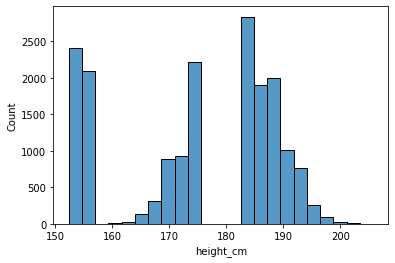

In [7]:
import seaborn as sns 
sns.histplot(data = df, x= df['height_cm'])

In [8]:
df[(df['height_cm'] <=160) & (df['height_cm'] >= 150)]     # 154.94 -> 181로, 152.40 -> 178로

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
6,231747,K. Mbappé,Kylian Mbappé,1998-12-20,20,152.40,73.0,"RW,ST,RM",France,88,...,66+3,62+3,62+3,62+3,66+3,62+3,54+3,54+3,54+3,62+3
15,211110,P. Dybala,Paulo Bruno Exequiel Dybala,1993-11-15,25,152.40,74.8,"CAM,RW",Argentina,89,...,62+3,58+3,58+3,58+3,62+3,56+3,45+3,45+3,45+3,56+3
17,135507,Fernandinho,Fernando Luiz Rosa,1985-05-04,33,152.40,67.1,CDM,Brazil,87,...,81+3,84+3,84+3,84+3,81+3,80+3,82+3,82+3,82+3,80+3
29,198710,J. Rodríguez,James David Rodríguez Rubio,1991-07-12,27,154.94,74.8,"CAM,CM,RM",Colombia,87,...,69+3,68+3,68+3,68+3,69+3,65+3,58+3,58+3,58+3,65+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17906,191043,Alex Sandro,Alex Sandro Lobo Silva,1991-01-26,28,154.94,79.8,"LB,LM",Brazil,86,...,83+3,81+3,81+3,81+3,83+3,83+3,81+3,81+3,81+3,83+3
17910,201942,Roberto Firmino,Roberto Firmino Barbosa de Oliveira,1991-10-02,27,154.94,76.2,"CF,ST,CAM",Brazil,86,...,72+3,73+3,73+3,73+3,72+3,69+3,67+3,67+3,67+3,69+3
17926,188350,M. Reus,Marco Reus,1989-05-31,29,154.94,71.2,"CAM,LM,ST",Germany,88,...,69+3,65+3,65+3,65+3,69+3,64+3,54+3,54+3,54+3,64+3
17941,192985,K. De Bruyne,Kevin De Bruyne,1991-06-28,27,154.94,69.9,"CAM,CM",Belgium,91,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [9]:
df['positions'][(df['height_cm'] > 195) | (df['height_cm'] <= 163)].value_counts(normalize=True)        

ST               0.091259
CB               0.066775
GK               0.065156
CM               0.052003
LB               0.047956
                   ...   
LM,LWB,RM,RWB    0.000202
RM,LM,LB         0.000202
RM,CAM,LM,CDM    0.000202
LB,LWB,CM        0.000202
ST,LW,RW,CAM     0.000202
Name: positions, Length: 487, dtype: float64

In [10]:
len(df[(df['positions'] =='ST') & (df['height_cm']<= 163)]) / len(df[(df['positions']=='ST')])   # ST 163 이하 약 23프로(키 수정 전)

0.22953634802518602

In [11]:
len(df[(df['positions'] =='GK') & (df['height_cm']>195)]) / len(df[(df['positions']=='GK')])  # 골키퍼 195 이상 약 10 프로

0.0910411622276029

In [12]:
len(df[(df['positions'] =='CB') & (df['height_cm']>195)]) / len(df[(df['positions']=='CB')])  # CB 195 이상 약 5프로

0.04681230494872938

In [13]:
len(df[(df['positions'] =='ST') & (df['height_cm']>195)]) / len(df[(df['positions']=='ST')]) # ST 195 이상 약 3프로

0.028620492272467088

## 체중 확인


(67.0, 76.0)

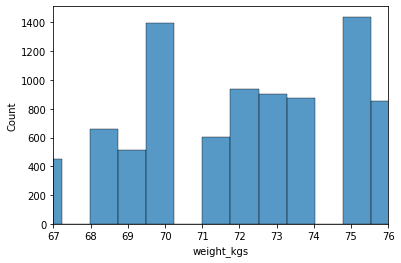

In [14]:
import matplotlib.pyplot as plt

sns.histplot(data = df, x= df['weight_kgs'])
plt.xlim(67,76)

In [15]:
df[~(df['weight_kgs'] > 103 ) & ~(df['weight_kgs'] < 56)]     # 체중 이상치 (제거)

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,204322,R. McKenzie,Rory McKenzie,1993-10-07,25,175.26,74.8,"RM,CAM,CM",Scotland,67,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,239762,M. Sipľak,Michal Sipľak,1996-02-02,23,182.88,79.8,LB,Slovakia,59,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,235155,J. Bekkema,Jan Bekkema,1996-04-09,22,185.42,89.8,GK,Netherlands,59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17952,244883,A. Al Yami,Abdulrahman Al Yami,1997-06-19,21,175.26,64.9,"ST,LM",Saudi Arabia,59,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


# feature Engineering
 - 키 
  - 154.94 -> 181로, 152.40 -> 178로

 - 체중 이상치 처리
  - (df['weight_kgs'] > 103 ) | (df['weight_kgs'] < 56) 제거

In [16]:
df[df['body_type'] == 'PLAYER_BODY_TYPE_25'].T

,14
id,209331
name,M. Salah
full_name,Mohamed Salah Ghaly
birth_date,1992-06-15
age,26
...,...
LB,66+3
LCB,57+3
CB,57+3
RCB,57+3


<AxesSubplot:ylabel='Frequency'>

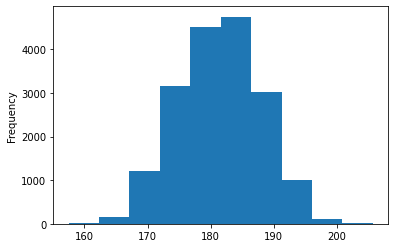

In [17]:
df_tmp = df.copy() 
df_tmp = df_tmp.replace({154.94: 181.00, 152.40: 178.50})
df_tmp['height_cm'].plot(kind='hist')

In [18]:
# club_jersey_number 1~20 만 남기기, 나머지 Others
# national_team Nan -> 1,0 으로
# tags -> 1,0 으로
# position == GK ->  Nan 값 0 으로

## feature engineering 확인


In [19]:
df_tmp.loc[(df_tmp['club_jersey_number'] >= 20),'club_jersey_number'] = 'Others'
df_tmp.loc[:30,['name','club_jersey_number']].T

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
name,L. Messi,C. Eriksen,P. Pogba,L. Insigne,K. Koulibaly,V. van Dijk,K. Mbappé,S. Agüero,M. Neuer,E. Cavani,...,D. Mertens,Marcelo,T. Alderweireld,Jordi Alba,Thiago,C. Immobile,K. Navas,Isco,J. Rodríguez,Casemiro
club_jersey_number,10.0,Others,6.0,Others,Others,4.0,7.0,10.0,1.0,9.0,...,14.0,12.0,4.0,18.0,6.0,17.0,1.0,Others,11.0,14.0


In [20]:
df_tmp['body_type'] = df_tmp['body_type'].replace({'Messi':'Normal',                              # body_type 오류값 변경
                                                      'Courtois':'Lean',
                                                      'PLAYER_BODY_TYPE_25':'Normal',
                                                      'Akinfenwa':'Normal',
                                                      'Shaqiri':'Stocky',
                                                      'Neymar':'Normal',
                                                      'C. Ronaldo':'Normal'})
df_tmp['body_type'].nunique()

3

In [21]:
df_tmp['tags'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
17949    False
17950     True
17951     True
17952     True
17953     True
Name: tags, Length: 17954, dtype: bool

In [22]:
df_tmp['tags'] = df_tmp.copy()['tags'].notnull().astype('int')
df_tmp['tags']

0        1
1        1
2        1
3        1
4        1
        ..
17949    1
17950    0
17951    0
17952    0
17953    0
Name: tags, Length: 17954, dtype: int64

In [23]:
df[df.iloc[:,-26:].isnull().any(axis=1)]

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
8,167495,M. Neuer,Manuel Neuer,1986-03-27,32,193.04,92.1,GK,Germany,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,192119,T. Courtois,Thibaut Courtois,1992-05-11,26,198.12,96.2,GK,Belgium,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,192448,M. ter Stegen,Marc-André ter Stegen,1992-04-30,26,187.96,84.8,GK,Germany,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,193041,K. Navas,Keylor Navas,1986-12-15,32,185.42,79.8,GK,Costa Rica,87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,206585,Kepa,Kepa Arrizabalaga,1994-10-03,24,185.42,84.8,GK,Spain,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17921,162835,S. Handanovič,Samir Handanovič,1984-07-14,34,193.04,92.1,GK,Slovenia,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17923,167948,H. Lloris,Hugo Lloris,1986-12-26,32,187.96,82.1,GK,France,88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17936,200389,J. Oblak,Jan Oblak,1993-01-07,26,187.96,87.1,GK,Slovenia,90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17942,193080,De Gea,David De Gea Quintana,1990-11-07,28,193.04,76.2,GK,Spain,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_tmp = df.copy()
df_tmp[(df_tmp.positions =='GK')] = df_tmp[(df_tmp.positions =='GK')].fillna(0)
df_tmp                                                                                 # position = GK 일때, nan -> 0 으로 

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,...,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,...,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,...,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,204322,R. McKenzie,Rory McKenzie,1993-10-07,25,175.26,74.8,"RM,CAM,CM",Scotland,67,...,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,239762,M. Sipľak,Michal Sipľak,1996-02-02,23,182.88,79.8,LB,Slovakia,59,...,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,235155,J. Bekkema,Jan Bekkema,1996-04-09,22,185.42,89.8,GK,Netherlands,59,...,0,0,0,0,0,0,0,0,0,0
17952,244883,A. Al Yami,Abdulrahman Al Yami,1997-06-19,21,175.26,64.9,"ST,LM",Saudi Arabia,59,...,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


for col in df_tmp.columns[-26:]:
      df_tmp[col] = df_tmp.loc[:,col].map(pd.eval).astype(int)

df_tmp

## feature engineering 함수

In [25]:
def feature_engineering(df):
    df_tmp = df.copy()

    df_tmp = df_tmp.replace({154.94: 181.00, 152.40: 178.50})                             # 키 오류값 변경

    df_tmp['body_type'] = df_tmp['body_type'].replace({'Messi':'Normal',                  # body_type 오류값 변경     ->  이후 ['body_type'].nunique() == 3
                                                      'Courtois':'Lean',
                                                      'PLAYER_BODY_TYPE_25':'Normal',
                                                      'Akinfenwa':'Normal',
                                                      'Shaqiri':'Stocky',
                                                      'Neymar':'Normal',
                                                      'C. Ronaldo':'Normal'})
    
    df_tmp = df_tmp[~(df_tmp['weight_kgs'] > 103 ) & ~(df_tmp['weight_kgs'] < 56)]        # 체중 이상치 제거 ( 103 이상, 56 미만)

    df_tmp['national_team'] = df_tmp['national_team'].notnull().astype('int')             # national_team 국적 ->  여, 부로

    df_tmp['tags'] = [i for i in df_tmp.tags.str.count("#")]
    df_tmp['tags'] = df_tmp['tags'].fillna(value = 0)                                     # tags " # " 개수로

    df_tmp.loc[((df_tmp['club_jersey_number'] >= 20) | 
                (df_tmp['club_jersey_number'].isna())),'club_jersey_number'] = 'Others'   # 등번호 1~20 제외 'Others' 로

    df_tmp[(df_tmp.positions =='GK')] = df_tmp[(df_tmp.positions =='GK')].fillna(0)       # position = GK 일때, nan -> 0 으로 (GK 아닌 포지션 값들 nan -> 0)  

    for col in df_tmp.columns[-26:]:
      df_tmp[col] = df_tmp.loc[:,col].map(pd.eval).astype(int)
    
    dels = ['traits',                                                                  
            'id','full_name',
            'birth_date',                                                                 # 고유값들, 비슷한 속성들, 게임성 높은 특성(실측 제한 요소) drop
            'potential', 
            'national_rating',
            'national_team_position',
            'national_jersey_number',
            'agility',
            'reactions',
            'balance',
            'shot_power',
            'stamina',
            'aggression',
            'positioning',
            'composure'
            ]
    df_tmp.drop(columns = dels, inplace=True)
    

    return df_tmp

In [26]:
df_cleaned = feature_engineering(df)

In [27]:
pd.DataFrame(df_cleaned.nunique())        # feature engineering 확인 

,0
name,16959
age,29
height_cm,20
weight_kgs,47
positions,889
...,...
LB,57
LCB,64
CB,64
RCB,64


In [28]:
df_cleaned.info()                         # feature engineering 확인 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17913 entries, 0 to 17953
Data columns (total 76 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17913 non-null  object 
 1   age                            17913 non-null  int64  
 2   height_cm                      17913 non-null  float64
 3   weight_kgs                     17913 non-null  float64
 4   positions                      17913 non-null  object 
 5   nationality                    17913 non-null  object 
 6   overall_rating                 17913 non-null  int64  
 7   value_euro                     17699 non-null  float64
 8   wage_euro                      17704 non-null  float64
 9   preferred_foot                 17913 non-null  object 
 10  international_reputation(1-5)  17913 non-null  int64  
 11  weak_foot(1-5)                 17913 non-null  int64  
 12  skill_moves(1-5)               17913 non-null 

# target 값 확인

In [29]:
df_cleaned['international_reputation(1-5)'].value_counts(normalize=True)      # international reputation 을 target 으로 -> imbalanced, 5 classes

1    0.911628
2    0.068386
3    0.016803
4    0.002847
5    0.000335
Name: international_reputation(1-5), dtype: float64

In [30]:
df[(df['international_reputation(1-5)'] <=5) & (df['international_reputation(1-5)'] >= 4)].sort_values(by='international_reputation(1-5)').T      # 실제 선수 인지도 확인 -> 4 이상이 True

,17853,17850,17940,17864,17871,17872,17875,17881,17882,17883,...,17719,17725,45,17939,0,17943,46,8,17938,17944
id,184941,179844,183277,197445,120533,139720,176635,181872,183898,183907,...,146530,162895,41,177003,158023,190871,41236,167495,176580,20801
name,A. Sánchez,Diego Costa,E. Hazard,D. Alaba,Pepe,V. Kompany,M. Özil,A. Vidal,A. Di María,J. Boateng,...,Dani Alves,Cesc Fàbregas,Iniesta,L. Modrić,L. Messi,Neymar Jr,Z. Ibrahimović,M. Neuer,L. Suárez,Cristiano Ronaldo
full_name,Alexis Alejandro Sánchez Sánchez,Diego da Silva Costa,Eden Hazard,David Olatukunbo Alaba,Képler Laveran Lima Ferreira,Vincent Kompany,Mesut Özil,Arturo Vidal,Ángel Fabián Di María Hernández,Jérôme Boateng,...,Daniel Alves da Silva,Francesc Fàbregas i Soler,Andrés Iniesta Luján,Luka Modrić,Lionel Andrés Messi Cuccittini,Neymar da Silva Santos Junior,Zlatan Ibrahimović,Manuel Neuer,Luis Alberto Suárez Díaz,Cristiano Ronaldo dos Santos Aveiro
birth_date,1988-12-19,1988-10-07,1991-01-07,1992-06-24,1983-02-26,1986-04-10,1988-10-15,1987-05-22,1988-02-14,1988-09-03,...,1983-05-06,1987-05-04,1984-05-11,1985-09-09,1987-06-24,1992-02-05,1981-10-03,1986-03-27,1987-01-24,1985-02-05
age,30,30,28,26,36,32,30,31,31,30,...,35,31,34,33,31,27,37,32,32,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LB,62+3,59+3,60+3,81+3,74+3,75+3,51+3,81+3,66+3,78+3,...,78+3,65+3,68+3,80+3,59+2,61+3,51+4,NaN,66+5,61+3
LCB,57+3,61+3,49+3,78+3,82+3,82+3,40+3,83+3,57+3,83+3,...,75+3,62+3,63+3,72+3,48+2,47+3,52+4,NaN,63+5,53+3
CB,57+3,61+3,49+3,78+3,82+3,82+3,40+3,83+3,57+3,83+3,...,75+3,62+3,63+3,72+3,48+2,47+3,52+4,NaN,63+5,53+3
RCB,57+3,61+3,49+3,78+3,82+3,82+3,40+3,83+3,57+3,83+3,...,75+3,62+3,63+3,72+3,48+2,47+3,52+4,NaN,63+5,53+3


<AxesSubplot:xlabel='value_euro', ylabel='wage_euro'>

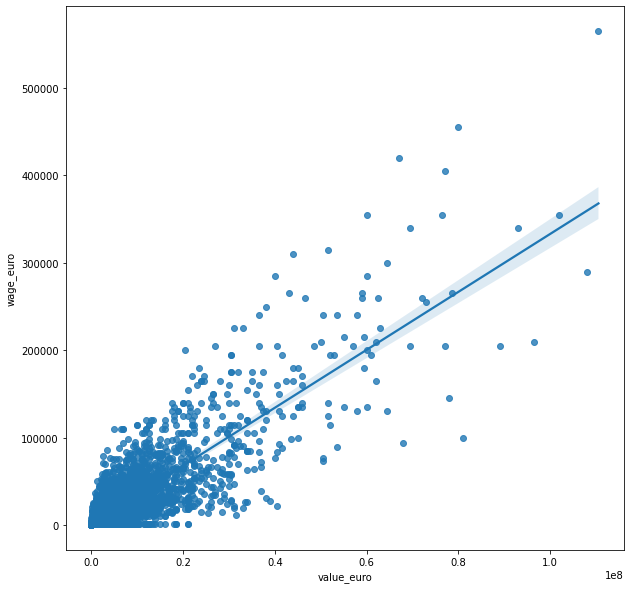

In [31]:
df_cleaned_tmp = df_cleaned.copy()
df_cleaned_tmp['value/overall_ratio'] = df_cleaned_tmp['value_euro'] /df_cleaned_tmp['overall_rating']                
plt.figure(figsize=(10,10))
sns.regplot(data= df_cleaned_tmp, x='value_euro', y='wage_euro')

In [32]:
df_cleaned_reputation = df_cleaned.copy()                                                             # world class  target column 생성 
df_cleaned_reputation['world_class'] = df_cleaned['international_reputation(1-5)'] >= 4
df_cleaned_reputation['world_class'].nunique()

2

In [33]:
df_cleaned_reputation = df_cleaned_reputation.drop(columns = ['international_reputation(1-5)','name'])

In [34]:
df_cleaned_reputation['world_class'].value_counts(normalize=True)                                     # 최빈값 기준모델 정확도 -> 0.99

False    0.996818
True     0.003182
Name: world_class, dtype: float64

# train, test split

In [35]:
from sklearn.model_selection import train_test_split
target = 'world_class'

X= df_cleaned_reputation.drop(columns = target)
y= df_cleaned_reputation[target]


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =42, stratify=y) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14330, 74), (3583, 74), (14330,), (3583,))

In [36]:
print("Train target distribution:\n", y_train.value_counts(normalize=True), "\n")
print("Val target distribution:\n", y_test.value_counts(normalize=True))

Train target distribution:
 False    0.99679
True     0.00321
Name: world_class, dtype: float64 

Val target distribution:
 False    0.99693
True     0.00307
Name: world_class, dtype: float64


# 모델 생성, 선택
 - xgb boost, early_stop

## 라이브러리 설치

In [37]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
from category_encoders import TargetEncoder,OrdinalEncoder
from sklearn.impute import SimpleImputer



preprocess_pipeline = make_pipeline(OrdinalEncoder(), 
                                    SimpleImputer())                               
   
   
model = XGBClassifier(random_state=42,
                      objective ='binary:logistic',
                      n_jobs=-1,
                      learning_rate=0.1,
                      scale_pos_weight = (0.996818 /0.003182)**(1/2),          # scale_pos_weight = Negative / Positive                   
                      max_depth = 4,
                      n_estimators = 10000,
                      eval_metric= 'auc'
)                                   


In [38]:
X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)

watchlist = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]

model.fit(
    X_train_preprocessed,
    y_train,
    eval_set= watchlist,
    early_stopping_rounds = 100,        # 100 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.997782	validation_1-auc:0.811832
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.998013	validation_1-auc:0.811896
[2]	validation_0-auc:0.998979	validation_1-auc:0.812952
[3]	validation_0-auc:0.999004	validation_1-auc:0.812952
[4]	validation_0-auc:0.999584	validation_1-auc:0.813346
[5]	validation_0-auc:0.999658	validation_1-auc:0.813932
[6]	validation_0-auc:0.999757	validation_1-auc:0.813919
[7]	validation_0-auc:0.999755	validation_1-auc:0.814046
[8]	validation_0-auc:0.999897	validation_1-auc:0.813779
[9]	validation_0-auc:0.999879	validation_1-auc:0.813957
[10]	validation_0-auc:0.999922	validation_1-auc:0.813906
[11]	validation_0-auc:0.999903	validation_1-auc:0.813957
[12]	validation_0-auc:0.999919	validation_1-auc:0.81397
[13]	validation_0-auc:0.999951	validation_1-auc:0.814021
[14]	validation_0-auc:0.999983	validation_1-auc:0.81425

XGBClassifier(eval_metric='auc', max_depth=4, n_estimators=10000, n_jobs=-1,
              random_state=42, scale_pos_weight=17.699371630886258)

In [39]:
y_pred_proba = model.predict_proba(X_test_preprocessed)[:,1]
  
report = classification_report(y_test, y_pred_proba > 0.5)

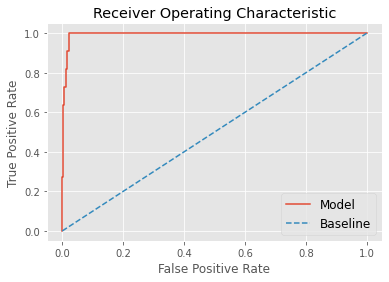

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      3572
        True       0.35      0.55      0.43        11

    accuracy                           1.00      3583
   macro avg       0.68      0.77      0.71      3583
weighted avg       1.00      1.00      1.00      3583



0.9941209406494961

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score



auc_score = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))

plt.style.use("ggplot")
plt.plot(fpr, tpr, label="Model")
plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
plt.xlabel("False Positive Rate", size=12)
plt.ylabel("True Positive Rate", size=12)
plt.title("Receiver Operating Characteristic")
plt.legend(prop={"size": 12})
plt.show()

print(report)
auc_score

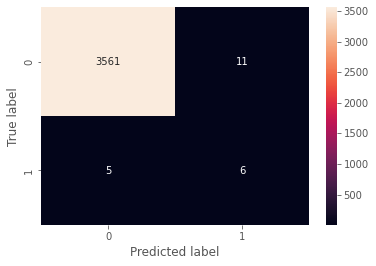

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, model.predict(X_test_preprocessed)), annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()                      # 대부분 0으로 예측한 모습 -> 낮은 recall

pipeline = clf.best_estimator_

preprocess_pipeline = make_pipeline(pipeline.named_steps['ordinalencoder'])

model =  make_pipeline(pipeline.named_steps['simpleimputer'],
                       pipeline.named_steps['xgbclassifier'])


X_test_preprocessed = preprocess_pipeline.transform(X_test)

In [42]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
        model,              
        scoring='roc_auc',                                    
        n_iter= 5,                                      
        random_state=2
)
    

permuter.fit(X_test_preprocessed, y_test)

PermutationImportance(estimator=XGBClassifier(eval_metric='auc', max_depth=4,
                                              n_estimators=10000, n_jobs=-1,
                                              random_state=42,
                                              scale_pos_weight=17.699371630886258),
                      random_state=2, scoring='roc_auc')

In [43]:
eli5.show_weights(permuter, top=None, feature_names=X_test.columns.tolist())
print("Top3 Important Features:")
p_i = sorted(
    list(zip(X_test.columns.tolist(), permuter.feature_importances_)),
    key=lambda x: x[1],
    reverse=True,
)
print(p_i[:3])

Top3 Important Features:
[('overall_rating', 0.025542095082968543), ('age', 0.004911941362109351), ('weight_kgs', 0.0021531100478468846)]


In [44]:
X_train_preprocessed

array([[ 23.  , 185.42,  79.8 , ...,  66.  ,  66.  ,  67.  ],
       [ 27.  , 182.88,  73.  , ...,  65.  ,  65.  ,  67.  ],
       [ 31.  , 181.  ,  69.9 , ...,  69.  ,  69.  ,  70.  ],
       ...,
       [ 24.  , 175.26,  67.1 , ...,  38.  ,  38.  ,  47.  ],
       [ 28.  , 185.42,  77.1 , ...,  40.  ,  40.  ,  48.  ],
       [ 25.  , 187.96,  79.8 , ...,   0.  ,   0.  ,   0.  ]])

In [45]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train_preprocessed[:500] )

shap.initjs()
shap.force_plot(
      base_value = explainer.expected_value, 
      shap_values = shap_values, 
      features=X_train.iloc[:500] )

Output hidden; open in https://colab.research.google.com to view.

## multiclass 분류 
 - 위의 international reputation 의 이진 분류는 유의미한 결과('overall_rating 이 가장 크게 영향을 준다')를 내지 못함
 - 위의 international reutation 의 이진 분류는 극히 imbalanced data 이어서 대부분 음의 영향을 준다고 판단
 - multicalss 분류 진행 - 더 좋은 분류(1~5) 기대

##imbalanced learn 설치

In [46]:
df_cleaned['international_reputation(1-5)'].nunique()         # df_cleaned 로 다시 multiclass 진행

5

In [47]:
df_cleaned['international_reputation(1-5)'].value_counts(normalize=True)      # international reputation 을 target 으로 -> imbalanced, 5 classes

1    0.911628
2    0.068386
3    0.016803
4    0.002847
5    0.000335
Name: international_reputation(1-5), dtype: float64

### 추가 feature engineering 
 - SHAP 해석 시 불필요한 feature들 추가 제거 ( 포지션 별 능력치, 국적 등)
 - overall_rating도 제거
 - GK 관련 drop -> 몇 없는 5 class 때문에 불가

In [48]:
df_cleaned = df_cleaned[df_cleaned.positions != 'GK']                           # GK row 들 drop

df_cleaned.loc[((df_cleaned['club_position'] != "SUB") &                        # club_positions의 후보, 대기 선수 제외(주전 선수들) -> 1로
                (df_cleaned['club_position'] != "RES")),'club_position'] = 1

In [49]:
dels1 = [col for col in df_cleaned.columns if 'GK' in col]         # GK 관련 column drop
dels2 = ['name',                                                   
        'nationality',
        'overall_rating',
        'club_join_date',
        'contract_end_year',
        'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM',
        'CDM','RDM','RWB','LB','LCB','CB','RCB','RB','club_jersey_number','club_team'] 
dels =  dels2  + dels1
df_cleaned.drop(columns = dels, inplace=True)       

In [50]:
target = 'international_reputation(1-5)'

X= df_cleaned.drop(columns = target)
y= df_cleaned[target]


X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state =42, stratify=y) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape


((12680, 37), (3171, 37), (12680,), (3171,))

In [51]:
print("Train target distribution:\n", y_train.value_counts(normalize=True), "\n")
print("Val target distribution:\n", y_test.value_counts(normalize=True))

Train target distribution:
 1    0.909306
2    0.070426
3    0.017114
4    0.002839
5    0.000315
Name: international_reputation(1-5), dtype: float64 

Val target distribution:
 1    0.909177
2    0.070325
3    0.017345
4    0.002838
5    0.000315
Name: international_reputation(1-5), dtype: float64


### class weight 방법
 - heatmap - TP 값이 FN 값보다 높은지
 - SHAP - 사례들 비교

In [52]:
import xgboost as xgb

preprocess_pipeline = make_pipeline(OrdinalEncoder(), SimpleImputer())                               


X_train_preprocessed = pd.DataFrame(preprocess_pipeline.fit_transform(X_train),columns= X_train.columns)           # 후에 DataFrame만 받는 pdp_isolate 를 위해 DataFrame 으로 변경
X_test_preprocessed = pd.DataFrame(preprocess_pipeline.transform(X_test), columns=X_test.columns) 

# dtrain = xgb.DMatrix(data= X_train_preprocessed, label= y_train)
# dtest = xgb.DMatrix(data= X_test_preprocessed, label= y_test)

In [53]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y= y_train
)                                         # class 별이 아닌, instance 별 weight을 모두 나타내는 array

In [54]:
len(classes_weights)

12680

In [55]:
model2 = XGBClassifier(random_state=42,
                       n_jobs=-1,
                       learning_rate=0.1,
                       max_depth = 6,
                       n_estimators = 10000,
                       eval_metric= 'mlogloss',
                       objective='multi:softprob',
                       num_class = 5
)     

watchlist = [(X_train_preprocessed, y_train), (X_test_preprocessed, y_test)]

model2.fit(
    X_train_preprocessed,
    y_train,
    sample_weight = classes_weights,
    eval_set= watchlist,
    early_stopping_rounds = 50,                                   # 50 rounds 동안 성능 개선이 없으면 학습을 중지
)

[0]	validation_0-mlogloss:1.42564	validation_1-mlogloss:1.42932
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.28148	validation_1-mlogloss:1.28985
[2]	validation_0-mlogloss:1.16409	validation_1-mlogloss:1.1767
[3]	validation_0-mlogloss:1.06415	validation_1-mlogloss:1.08019
[4]	validation_0-mlogloss:0.976711	validation_1-mlogloss:0.996946
[5]	validation_0-mlogloss:0.900331	validation_1-mlogloss:0.923861
[6]	validation_0-mlogloss:0.833809	validation_1-mlogloss:0.860322
[7]	validation_0-mlogloss:0.775639	validation_1-mlogloss:0.805149
[8]	validation_0-mlogloss:0.724539	validation_1-mlogloss:0.756206
[9]	validation_0-mlogloss:0.679837	validation_1-mlogloss:0.713771
[10]	validation_0-mlogloss:0.638387	validation_1-mlogloss:0.67403
[11]	validation_0-mlogloss:0.600908	validation_1-mlogloss:0.638601
[12]	validation_0-mlogloss:0.568052	validation_1-

XGBClassifier(eval_metric='mlogloss', max_depth=6, n_estimators=10000,
              n_jobs=-1, num_class=5, objective='multi:softprob',
              random_state=42)

In [56]:
results = model2.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

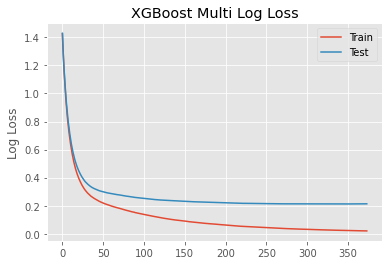

In [57]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Multi Log Loss')
pyplot.show()

In [58]:
model2.best_iteration

324

In [59]:
y_test_pred = model2.predict(X_test_preprocessed)

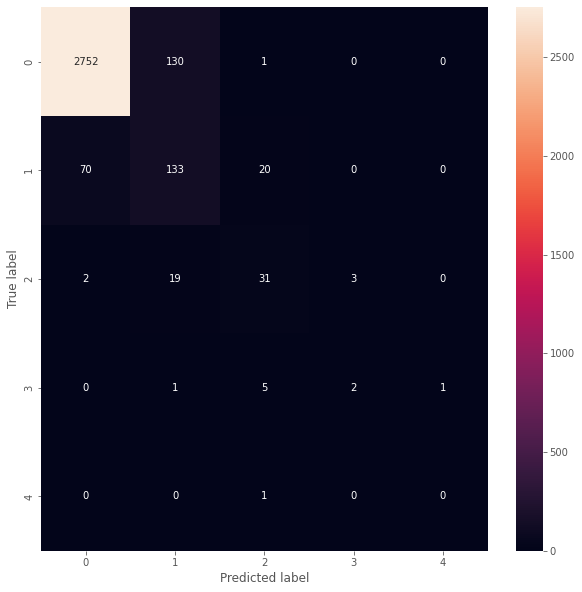

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()                      # 우하향 대각선 = TP //

In [61]:
pd.DataFrame(y_test_pred).value_counts()

1    2824
2     283
3      58
4       5
5       1
dtype: int64

In [62]:
explainer = shap.TreeExplainer(model2, data= X_train_preprocessed, model_output= "raw")
shap_values = explainer.shap_values(X_train_preprocessed[:300])    

i= 0
shap.initjs()
shap.force_plot(explainer.expected_value[0],                                            # 잘못됨
                shap_values[0][i],
                X_train.sort_values('value_euro',ascending=False).values[i],              
                feature_names = X_train.columns,
                link='logit')   # 분류될 확률로 변경

 99%|===================| 1489/1500 [00:57<00:00]       

In [63]:
explainer.expected_value

array([ 5.21220694, -1.24836771, -6.47967094, -8.03105093, -6.82048912])

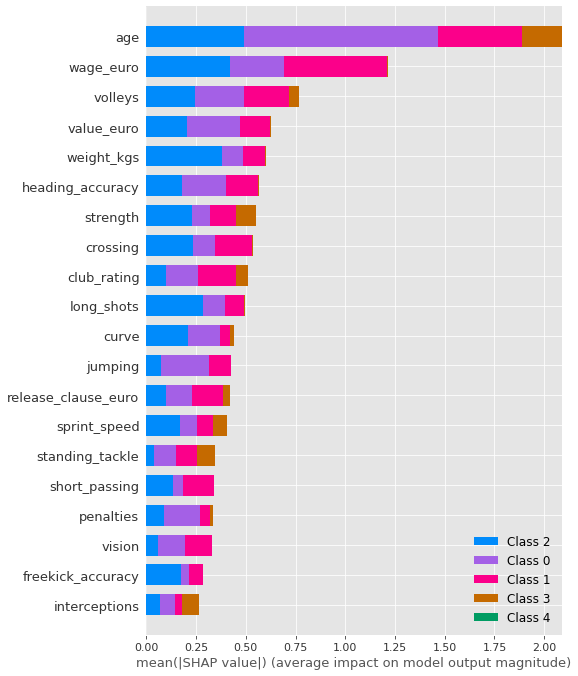

In [64]:
shap.summary_plot(shap_values, X_test,plot_type="bar")              # 나이, 주급, 발리슛 등

In [65]:
X_test.sort_values('value_euro',ascending=True)

,age,height_cm,weight_kgs,positions,value_euro,wage_euro,preferred_foot,weak_foot(1-5),skill_moves(1-5),work_rate,...,jumping,strength,long_shots,interceptions,vision,penalties,marking,standing_tackle,sliding_tackle,tags
4684,35,182.88,79.8,CB,20000.0,1000.0,Right,3,2,Low/ Medium,...,35,69,18,50,34,38,60,58,47,0.0
4145,38,175.26,71.2,LB,20000.0,1000.0,Left,2,2,Medium/ Medium,...,65,63,26,54,39,41,59,59,65,0.0
4940,19,178.50,66.2,LB,40000.0,1000.0,Left,3,2,Medium/ Medium,...,69,49,27,48,32,25,49,53,49,0.0
8376,37,187.96,79.8,"CB,CDM",40000.0,2000.0,Left,2,2,Low/ High,...,63,65,60,60,54,63,68,60,55,0.0
4809,24,181.00,73.0,LM,40000.0,1000.0,Left,3,2,Medium/ Medium,...,39,51,30,22,40,50,39,27,20,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,22,175.26,72.1,"CM,CAM",NaN,NaN,Right,3,3,Medium/ Medium,...,59,52,65,33,63,48,64,48,46,0.0
14696,33,175.26,74.8,"CAM,RM",NaN,NaN,Right,4,3,Medium/ Medium,...,54,56,73,42,66,71,39,37,27,0.0
8553,27,181.00,77.1,CB,NaN,NaN,Right,3,2,Medium/ High,...,72,76,24,56,34,33,58,63,62,0.0
2438,27,175.26,69.9,RB,NaN,NaN,Right,2,2,Medium/ Medium,...,58,47,22,67,39,44,63,66,64,0.0


In [81]:
i= 299
shap.initjs()
shap.force_plot(explainer.expected_value[0],
                shap_values[0][i],
                X_test.sort_values('value_euro',ascending=False).values[i],                # 해석?
                feature_names = X_test.columns)

ValueError: ignored

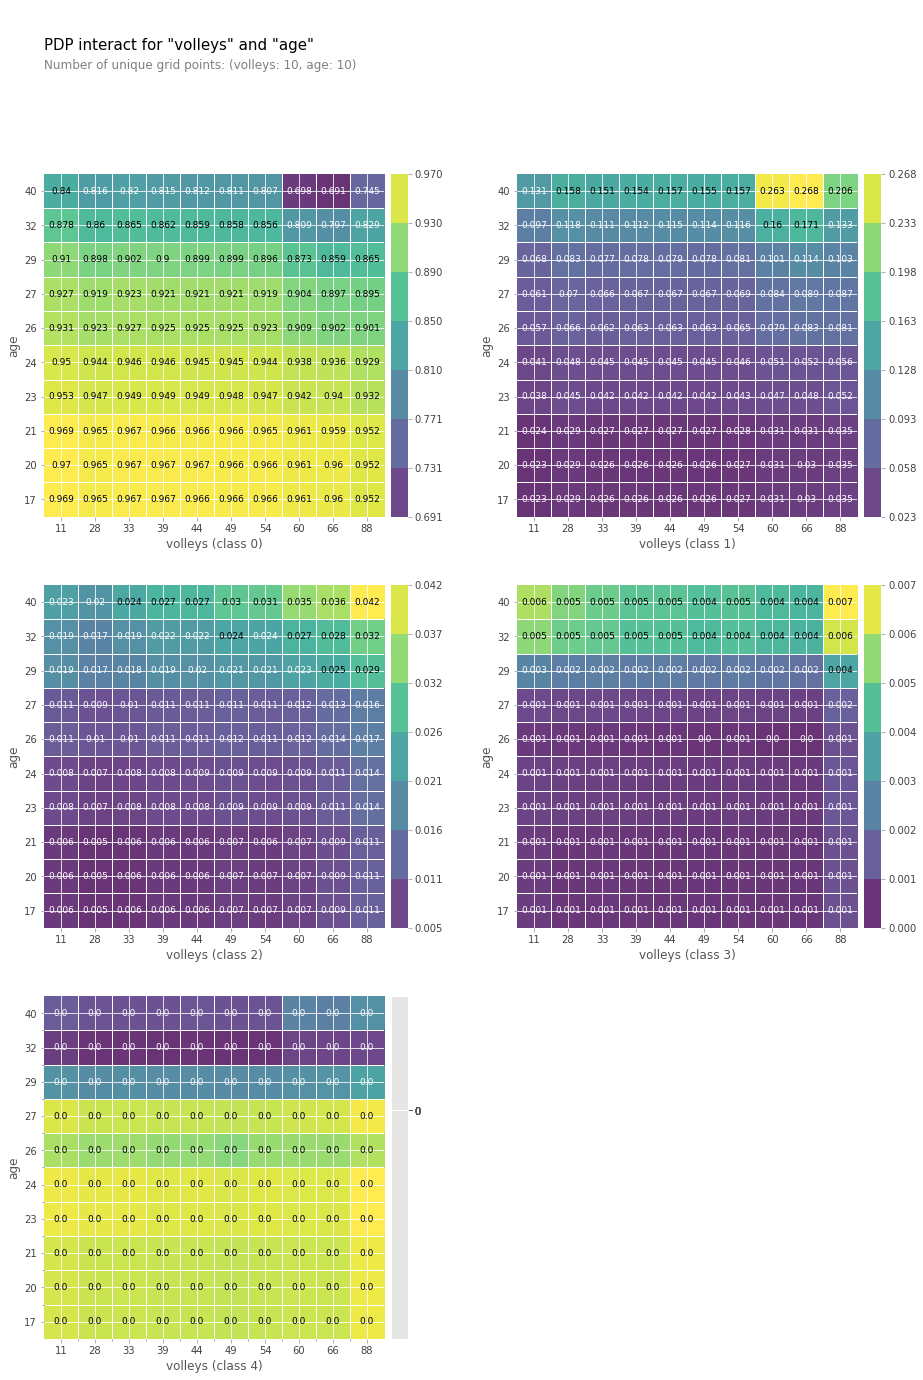

In [89]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
features = ['volleys', 'age']

interaction = pdp_interact(
    model= model2, 
    dataset=X_test_preprocessed,
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

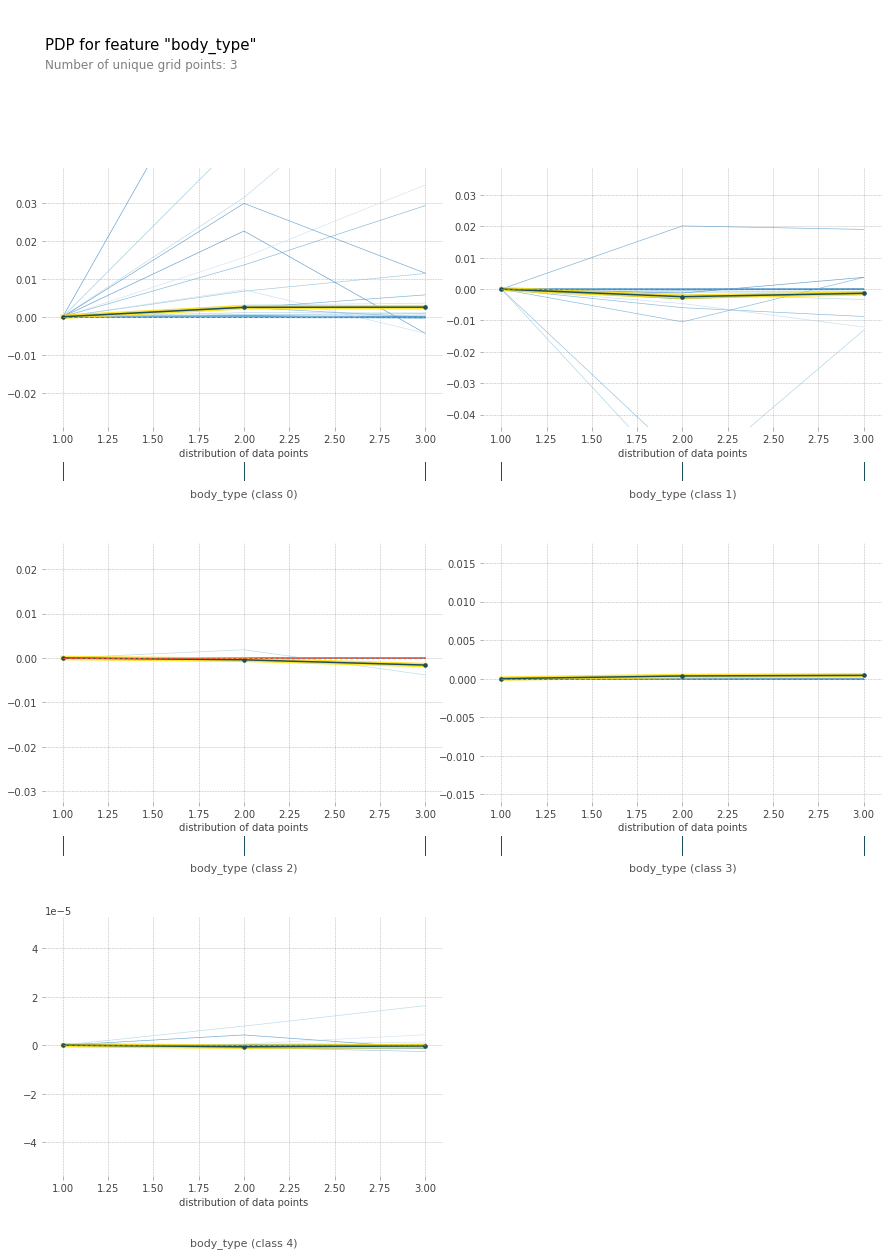

In [85]:
isolated = pdp_isolate(
    model= model2, 
    dataset= pd.DataFrame(X_test_preprocessed,columns= X_test.columns), 
    model_features=X_test.columns, 
    feature='body_type'
)                                                                                      # 실력이 좋을수록 나이는(미약하게나마) 긍정적으로 작용

pdp_plot(isolated, feature_name='body_type',
         plot_lines=True,
         frac_to_plot = 0.01,
         plot_pts_dist=True)    
plt.xlim(15,40);                                             # without GK

### SMOTE 방법


#### 라이브러리 설치

#### feature engineering 
 - 5 class sample 수가 너무 적어서 분류 불가
 - 4 와 5 class 합쳐서 총 4 class로 변경

In [90]:
df_cleaned.loc[((df_cleaned['international_reputation(1-5)'] >= 4)),
               'international_reputation(1-5)'] = 4

Baseline Accuracy: 0.9092801715980064


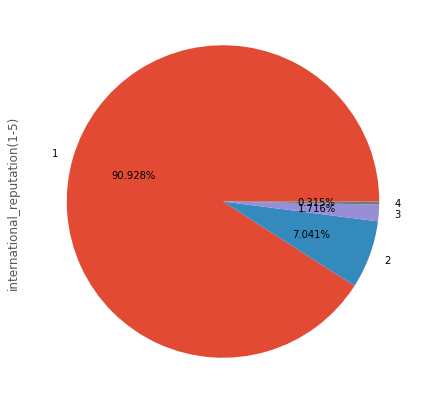

In [91]:
target = 'international_reputation(1-5)'

plt.figure(figsize=(7,9))
df_cleaned[target].value_counts(normalize=True).plot.pie(autopct="%.3f%%")
print("Baseline Accuracy:", df_cleaned[target].value_counts(normalize=True).max())

In [92]:
train, test = train_test_split(df_cleaned, test_size=0.2, stratify=df_cleaned[target], random_state=42)
train.shape, test.shape

((12680, 38), (3171, 38))

In [93]:
print("Train target distribution:\n", train[target].value_counts(normalize=True), "\n")
print("Test target distribution:\n", test[target].value_counts(normalize=True))         # stratify 확인

Train target distribution:
 1    0.909306
2    0.070426
3    0.017114
4    0.003155
Name: international_reputation(1-5), dtype: float64 

Test target distribution:
 1    0.909177
2    0.070325
3    0.017345
4    0.003154
Name: international_reputation(1-5), dtype: float64


In [94]:
X_train, y_train = train.drop(columns=[target]), train[target]
X_test, y_test = test.drop(columns=[target]), test[target]

In [95]:
print(y_train.value_counts(),'\n',
      y_test.value_counts())

1    11530
2      893
3      217
4       40
Name: international_reputation(1-5), dtype: int64 
 1    2883
2     223
3      55
4      10
Name: international_reputation(1-5), dtype: int64


In [96]:
preprocess_pipeline = make_pipeline(OrdinalEncoder(), SimpleImputer())                               

X_train_preprocessed = pd.DataFrame(preprocess_pipeline.fit_transform(X_train),columns= X_train.columns)           # 후에 DataFrame만 받는 pdp_isolate 을 위해 DataFrame 으로 변경
X_test_preprocessed = pd.DataFrame(preprocess_pipeline.transform(X_test), columns=X_test.columns)



In [97]:
from imblearn.combine import SMOTEENN

X_train_sampled, y_train_sampled = SMOTEENN(random_state=42).fit_resample(
    X_train_preprocessed, y_train)

In [98]:
y_train_sampled.value_counts()      # balanced 된 class 분포 (극단적)

4    9960
1    9493
3    8216
2    7642
Name: international_reputation(1-5), dtype: int64

In [99]:
model3 = XGBClassifier(random_state=42,
                       n_jobs=-1,
                       learning_rate=0.1,
                       max_depth = 6,
                       n_estimators = 10000,
                       eval_metric= 'mlogloss',
                       objective='multi:softprob',
                       num_class= 4
)     

watchlist = [(X_train_sampled, y_train_sampled), (X_test_preprocessed, y_test)]

model3.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set= watchlist,
    early_stopping_rounds = 50,                                   # 50 rounds 동안 성능 개선이 없으면 학습을 중지
)

[0]	validation_0-mlogloss:1.24603	validation_1-mlogloss:1.23715
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:1.12959	validation_1-mlogloss:1.11996
[2]	validation_0-mlogloss:1.03078	validation_1-mlogloss:1.02063
[3]	validation_0-mlogloss:0.945879	validation_1-mlogloss:0.937501
[4]	validation_0-mlogloss:0.870199	validation_1-mlogloss:0.864464
[5]	validation_0-mlogloss:0.805522	validation_1-mlogloss:0.802542
[6]	validation_0-mlogloss:0.7464	validation_1-mlogloss:0.748752
[7]	validation_0-mlogloss:0.694422	validation_1-mlogloss:0.702149
[8]	validation_0-mlogloss:0.647691	validation_1-mlogloss:0.659894
[9]	validation_0-mlogloss:0.606201	validation_1-mlogloss:0.623519
[10]	validation_0-mlogloss:0.568422	validation_1-mlogloss:0.591047
[11]	validation_0-mlogloss:0.534719	validation_1-mlogloss:0.56229
[12]	validation_0-mlogloss:0.503816	validation_1

XGBClassifier(eval_metric='mlogloss', max_depth=6, n_estimators=10000,
              n_jobs=-1, num_class=4, objective='multi:softprob',
              random_state=42)

In [100]:
results = model3.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

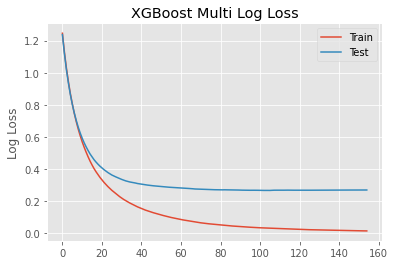

105


In [101]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Multi Log Loss')
pyplot.show()
print(model3.best_iteration)

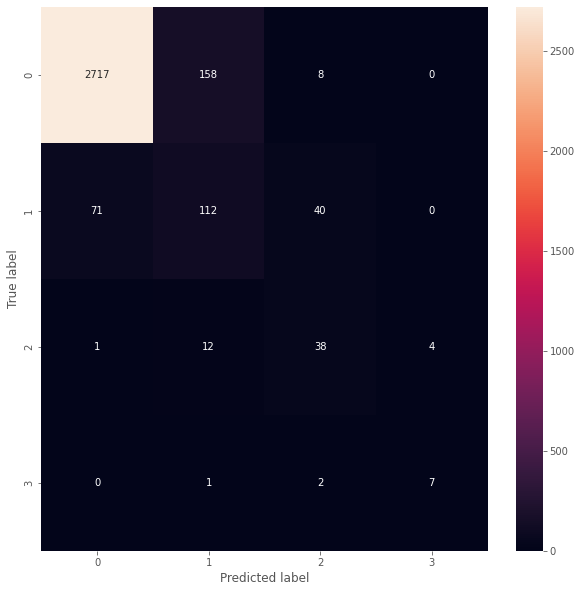

In [102]:
y_test_pred = model3.predict(X_test_preprocessed)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()                      # 우하향 대각선 = TP 

In [112]:
explainer = shap.TreeExplainer(model3, data= X_train_sampled)
shap_values = explainer.shap_values(X_train_sampled[:300])    

i= 299
shap.initjs()
shap.force_plot(explainer.expected_value[0],                     
                shap_values[0][i],
                X_test.sort_values('value_euro',ascending=False).values[i],              
                feature_names = X_test.columns)                                  # 해석 불가..

 96%|=================== | 1155/1200 [00:25<00:00]       

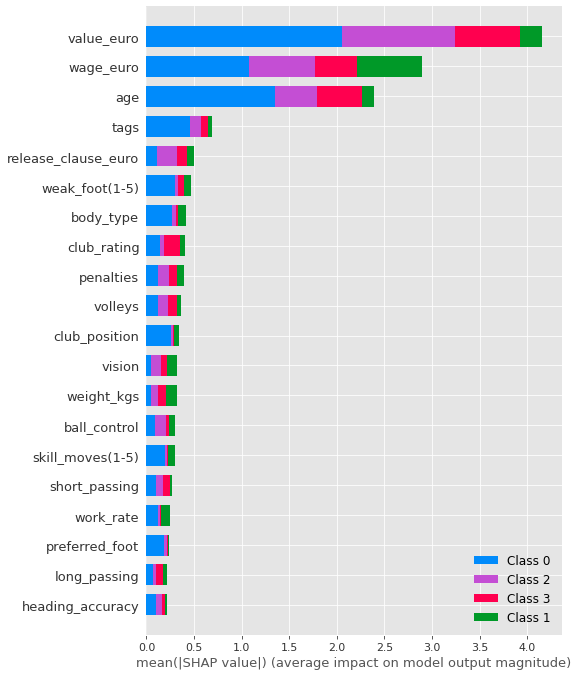

In [104]:
shap.summary_plot(shap_values, X_test,plot_type="bar")  

(<Figure size 1080x1080 with 5 Axes>,
 {'pdp_ax': [<AxesSubplot:xlabel='volleys (class 0)'>,
   <AxesSubplot:xlabel='volleys (class 1)'>,
   <AxesSubplot:xlabel='volleys (class 2)'>,
   <AxesSubplot:xlabel='volleys (class 3)'>],
  'title_ax': <AxesSubplot:>})

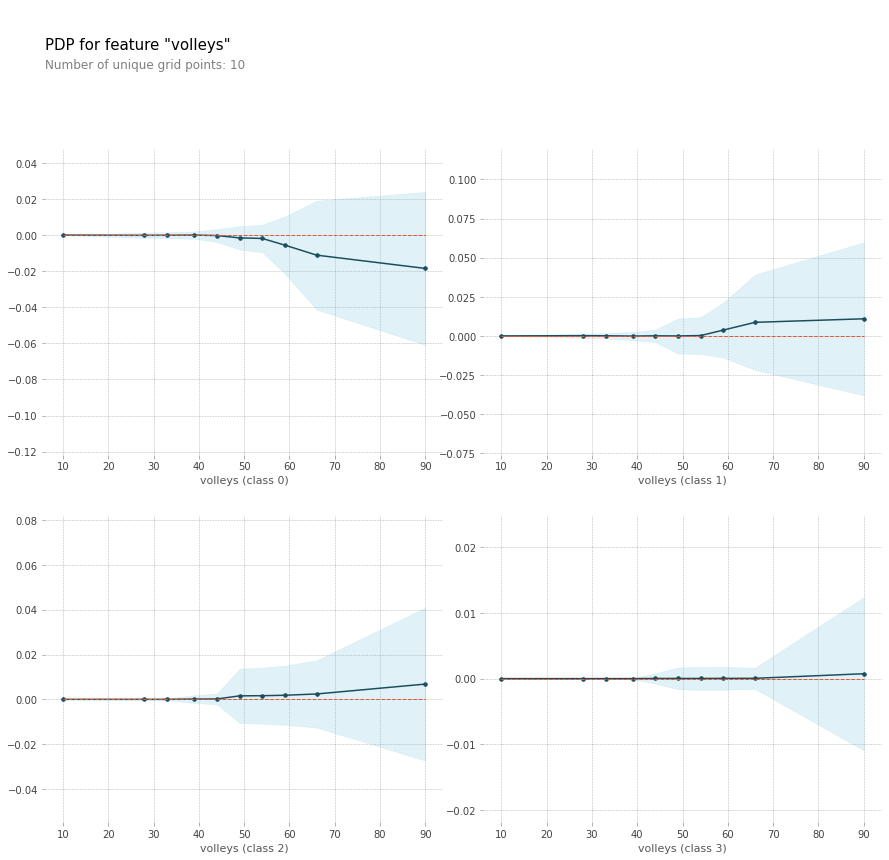

In [116]:
isolated2 = pdp_isolate(
    model= model3, 
    dataset= pd.DataFrame(X_train_preprocessed,columns= X_train.columns), 
    model_features=X_train.columns, 
    feature='volleys'
)                    
pdp_plot(isolated2, feature_name='volleys')  

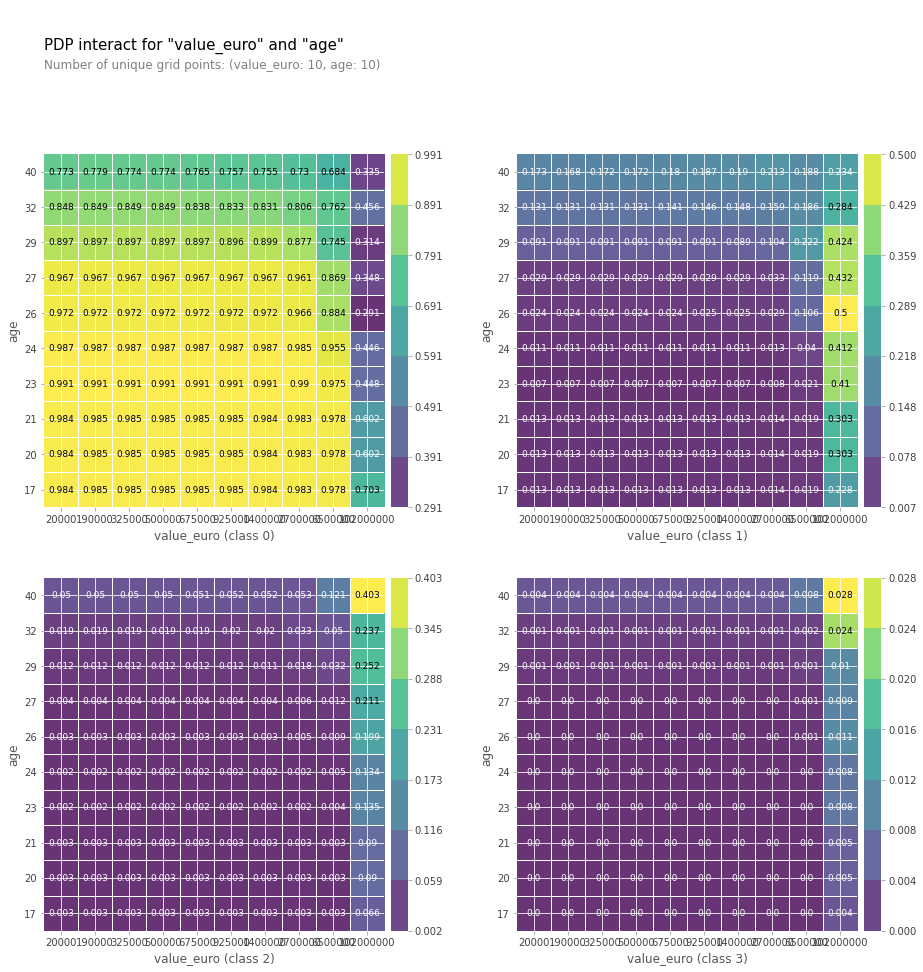

In [117]:
features = ['value_euro', 'age']

interaction = pdp_interact(
    model= model3, 
    dataset= X_test_preprocessed,
    model_features= X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  feature_names=features);

### ensemble 방법

In [83]:
from imblearn.ensemble import BalancedBaggingClassifier

model4 = XGBClassifier(
    objective='multi:softmax',
    eval_metric="mlogloss",
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    max_depth=6,
    learning_rate=0.1,
)

bbc = BalancedBaggingClassifier(base_estimator= model4, n_estimators=100, random_state=42)

In [84]:
bbc.fit(X_train_preprocessed, y_train)

BalancedBaggingClassifier(base_estimator=XGBClassifier(eval_metric='mlogloss',
                                                       max_depth=6, n_jobs=-1,
                                                       objective='multi:softmax',
                                                       random_state=42),
                          n_estimators=100, random_state=42)

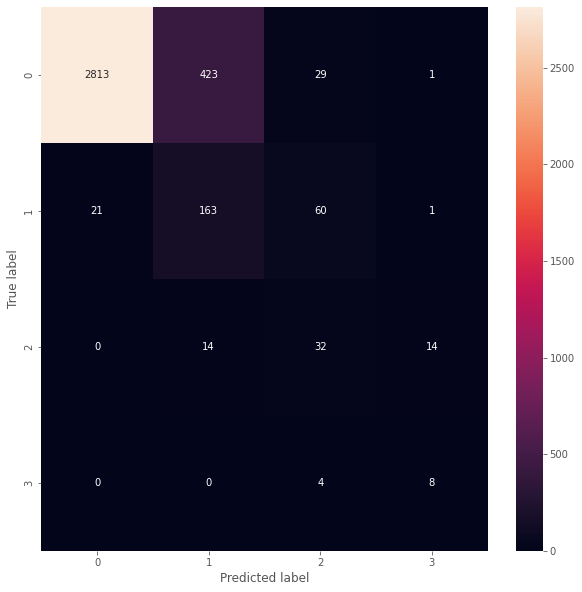

In [85]:
y_test_pred = bbc.predict(X_test_preprocessed)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt="g")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()  